In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import cv2, numpy as np
import matplotlib.pyplot as plt

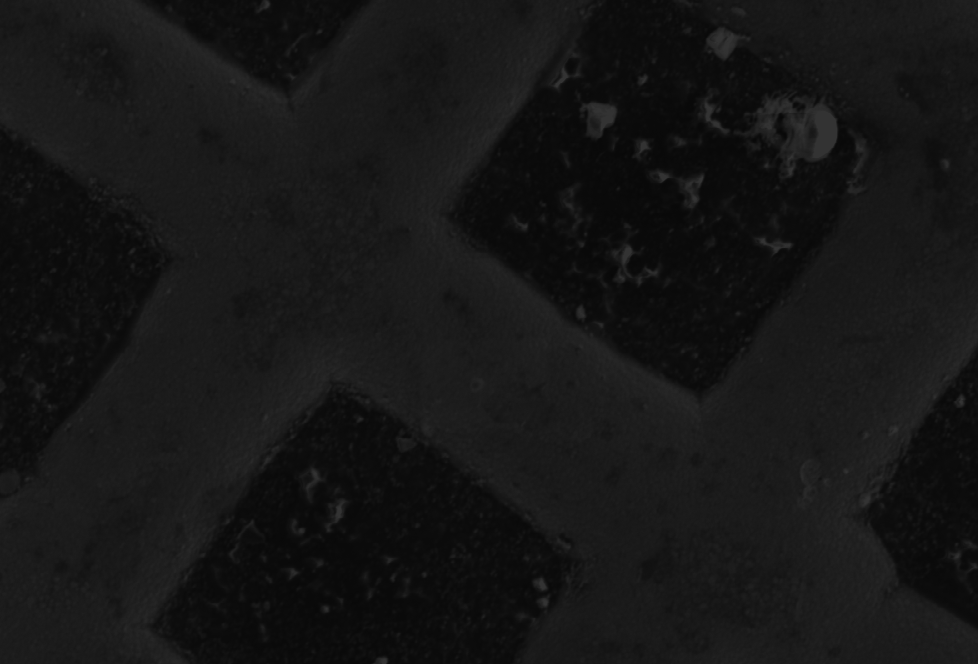

In [2]:
im = Image.open("images_png/2.png").convert("L")
im

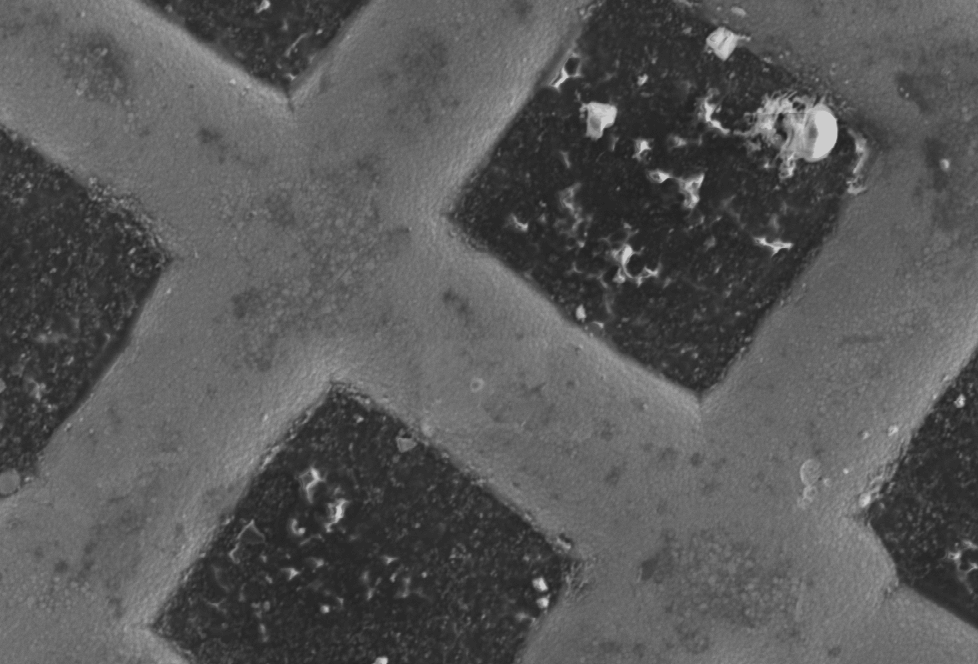

In [20]:
imBrightness = ImageEnhance.Brightness(im)
imBright = imBrightness.enhance(4)
imBright

In [21]:
imArray = np.asarray(imBright.convert('L'))
imArray.shape

(664, 978)

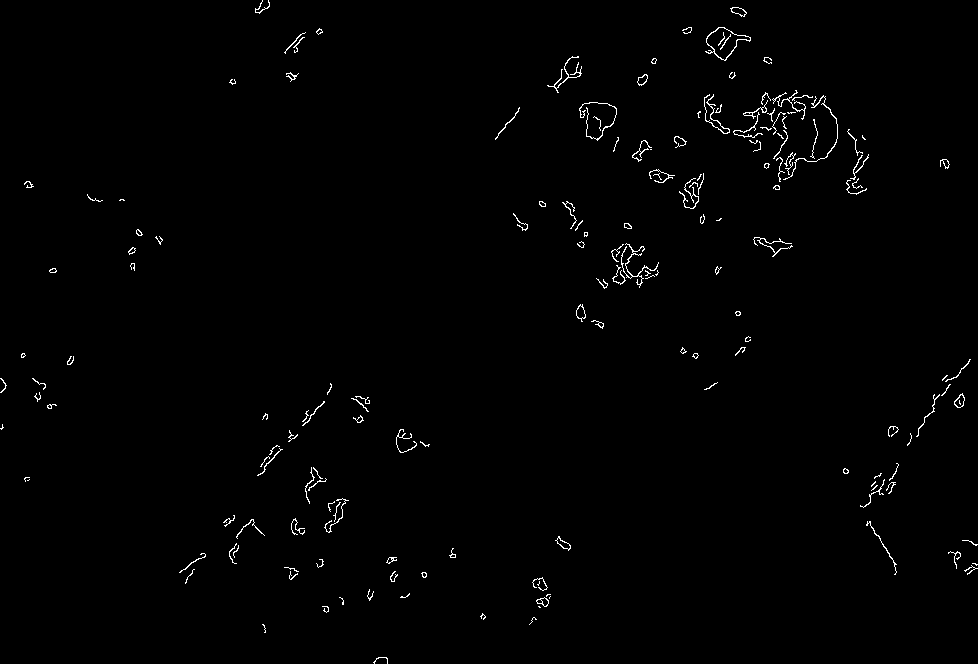

In [23]:
edges = cv2.Canny(cv2.GaussianBlur(imArray,(3,3),10), 100, 200)
Image.fromarray(edges)


C:\Users\munky\AppData\Local\Temp/ipykernel_33520/1756400682.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(((20*np.log10( 0.1 + shift)).astype(int)), cmap="gray")


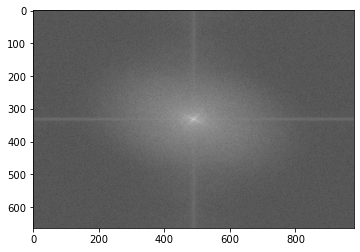

In [6]:
dft = np.fft.fft2(imArray.astype(float))
shift = np.fft.fftshift(dft)
plt.imshow(((20*np.log10( 0.1 + shift)).astype(int)), cmap="gray")

In [7]:
(w, h) = imArray.shape
half_w, half_h = int(w/2), int(h/2)

C:\Users\munky\AppData\Local\Temp/ipykernel_33520/3954340924.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + shift)).astype(int), cmap="gray")


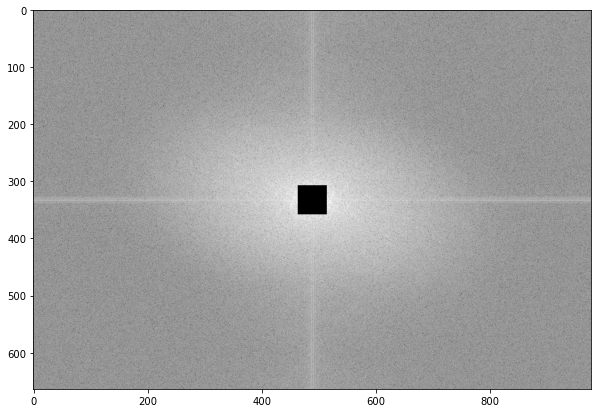

In [8]:
n = 25
shift[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + shift)).astype(int), cmap="gray")

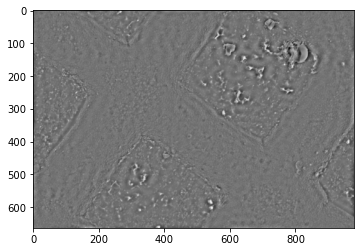

In [9]:
ifft = np.fft.ifft2(np.fft.ifftshift(shift)).real
plt.imshow(ifft, cmap="gray")

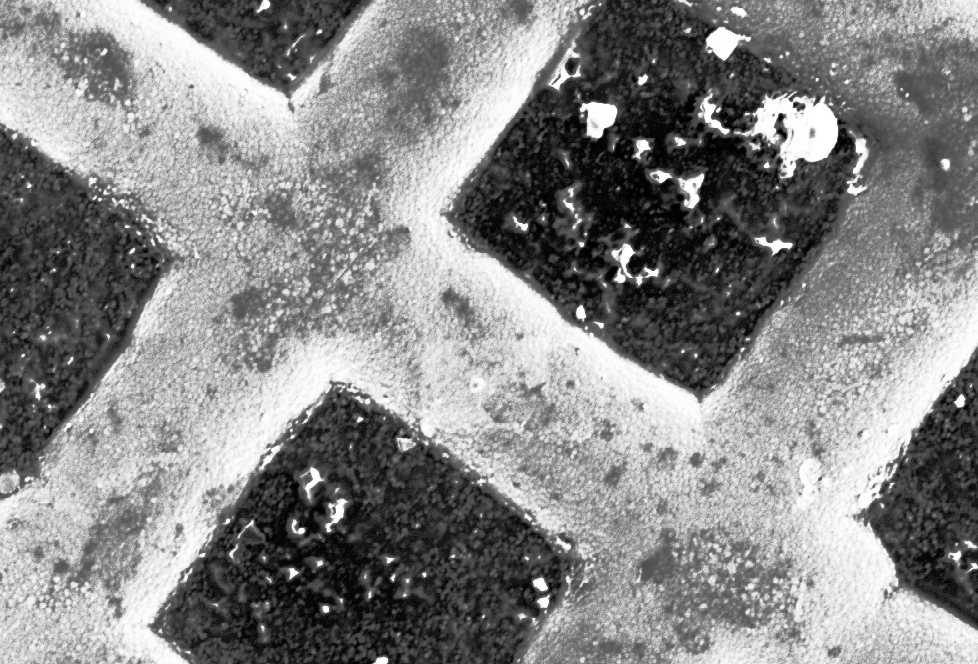

In [11]:
equalised = cv2.equalizeHist(imArray)
Image.fromarray(equalised)